# Get the data

In [1]:
using CSV
using StatsPlots
using DataFrames
using Random
using Turing
using TuringModels



┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1342
ERROR: LoadError: LoadError: TypeError: in Type{...} expression, expected UnionAll, got Type{Parsers.Options}
Stacktrace:
  [1] top-level scope
    @ ~/.julia/packages/CSV/Zl2ww/src/detection.jl:164
  [2] include(mod::Module, _path::String)
    @ Base ./Base.jl:386
  [3] include(x::String)
    @ CSV ~/.julia/packages/CSV/Zl2ww/src/CSV.jl:1
  [4] top-level scope
    @ ~/.julia/packages/CSV/Zl2ww/src/CSV.jl:27
  [5] include
    @ ./Base.jl:386 [inlined]
  [6] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt64}}, source::Nothing)
    @ Base ./loading.jl:1235
  [7] top-level scope
    @ none:1
  [8] eval
    @ ./boot.jl:360 [inlined]
  [9] eval(x::Expr)
    @ Base.MainInclude ./client.jl:446
 [10] top-level scope
    @ none:1
in expression starting at /home/mao/.jul

LoadError: Failed to precompile CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b] to /home/mao/.julia/compiled/v1.6/CSV/jl_EwxEMU.

In [ ]:
Random.seed!(1)
df = CSV.read(data_path, DataFrame; delim=';')
df = filter(row -> row.age >= 18, df);

df.weight_c = df.weight .- 45 # center at 45 kg

In [9]:
df[1:6,:]

,height,weight,age,male,weight_c
,Float64,Float64,Float64,Int64,Float64
1,151.765,47.8256,63.0,1,2.82561
2,139.7,36.4858,63.0,0,-8.51419
3,136.525,31.8648,65.0,0,-13.1352
4,156.845,53.0419,41.0,1,8.04191
5,145.415,41.2769,51.0,0,-3.72313
6,163.83,62.9926,35.0,1,17.9926


# Define your model

In [10]:
@model function ANCOVA(height, weight, male)
    
    σ ~ truncated(Cauchy(0, 2), 0, Inf)
    α ~ Normal(139, 100)
    β_w ~ Normal(0, 10)
    β_m ~ Normal(0, 10)
    β_wm ~ Normal(0, 10)
   
    μ = α .+ β_w .* weight .+ β_m .* male .+ β_wm .* (weight.*male)
    
    height .~ Normal.(μ, σ)
end

model = ANCOVA(df.height, df.weight_c, df.male)

DynamicPPL.Model{var"#3#4",(:height, :weight, :male),(),(),Tuple{Array{Float64,1},Array{Float64,1},Array{Int64,1}},Tuple{}}(:ANCOVA, var"#3#4"(), (height = [151.765, 139.7, 136.525, 156.845, 145.415, 163.83, 149.225, 168.91, 147.955, 165.1  …  156.21, 160.655, 146.05, 156.21, 152.4, 162.56, 142.875, 162.56, 156.21, 158.75], weight = [2.8256064999999992, -8.514193499999998, -13.135162000000001, 8.041914499999997, -3.7231280000000027, 17.992589000000002, -6.756524499999998, 10.479971499999998, -10.130115000000004, 9.487738999999998  …  -0.9732265000000027, 2.882305500000001, -5.594194999999999, -3.949924000000003, -4.176720000000003, 2.031820500000002, -10.753804000000002, 7.163080000000001, 9.062496500000002, 7.531623500000002], male = [1, 0, 0, 1, 0, 1, 0, 1, 0, 1  …  0, 1, 0, 1, 0, 0, 0, 1, 0, 1]), NamedTuple())

In [11]:
# Run the model
chns = sample(model, NUTS(), MCMCThreads(), 3000, 4)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC /home/ja-r/.julia/packages/AbstractMCMC/oou1a/src/sample.jl:253
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/ja-r/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/ja-r/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/ja-r/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/ja-r/.julia/packages/

Chains MCMC chain (3000×17×4 Array{Float64,3}):

Iterations        = 1:3000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 3000
parameters        = α, β_m, β_w, β_wm, σ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters       mean       std   naive_se      mcse          ess      rhat 
      Symbol    Float64   Float64    Float64   Float64      Float64   Float64 

           α   151.3876    0.3603     0.0033    0.0046    6819.5928    1.0000
         β_m     6.4514    0.5332     0.0049    0.0064    7767.5273    1.0000
         β_w     0.5864    0.0580     0.0005    0.0007    6680.7723    0.9999
        β_wm     0.1133    0.0834     0.0008    0.0009    7741.9004    0.9999
           σ     4.2705    0.1604     0.0015    0.0016   10899.2315    0.9999

Quantiles
  parameters       2.

In [12]:
describe(chns)

2-element Array{ChainDataFrame,1}:
 Summary Statistics (5 x 7)
 Quantiles (5 x 6)

In [13]:
post = DataFrame(chns)

# model from the posteriors
function p_link(weight, male, α, β_w, β_m, β_wm)
    weight_c = weight -45
    return α .+ β_w .* weight_c .+ β_m .* male .+ β_wm .* (weight_c.*male)
end


p_link (generic function with 1 method)

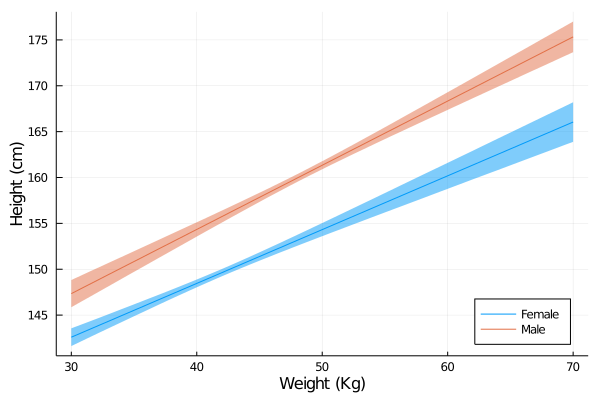

In [20]:

x_weight = 30:0.25:70

arr1 = [p_link.(w, 0, post.α, post.β_w, post.β_m, post.β_wm) for w in x_weight]
raw_p = DataFrame(arr1)
m = [mean(v) for v in arr1]
quantiles = [quantile(v, [0.1, 0.9]) for v in arr1]
lower = [q[1] - m for (q, m) in zip(quantiles, m)]
upper = [q[2] - m for (q, m) in zip(quantiles, m)]
plot(x_weight, m,  ribbon = [lower, upper], leg = :bottomright, label = "Female" )
#scatter!(df.weight, df.height)

arr2 = [p_link.(w, 1, post.α, post.β_w, post.β_m, post.β_wm) for w in x_weight]
raw_p = DataFrame(arr2)
m = [mean(v) for v in arr2]
quantiles = [quantile(v, [0.1, 0.9]) for v in arr2]
lower = [q[1] - m for (q, m) in zip(quantiles, m)]
upper = [q[2] - m for (q, m) in zip(quantiles, m)]

plot!(x_weight, m, ribbon = [lower, upper], label = "Male")
xlabel!("Weight (Kg)")
ylabel!("Height (cm)")




In [19]:
Matrix(DataFrame(arr))

12000×161 Array{Float64,2}:
 149.94   150.082  150.225  150.368  …  172.318  172.46   172.603  172.745
 148.071  148.237  148.402  148.568     174.099  174.265  174.431  174.597
 147.083  147.254  147.426  147.597     174.022  174.194  174.366  174.537
 144.654  144.869  145.083  145.297     178.31   178.525  178.739  178.954
 147.927  148.093  148.258  148.423     173.861  174.026  174.191  174.356
 147.737  147.91   148.083  148.256  …  174.878  175.051  175.224  175.397
 147.149  147.327  147.504  147.682     175.021  175.199  175.376  175.554
 147.224  147.398  147.572  147.746     174.553  174.727  174.901  175.075
 147.026  147.207  147.387  147.568     175.38   175.56   175.741  175.922
 146.939  147.116  147.294  147.471     174.747  174.924  175.101  175.278
 148.284  148.453  148.621  148.79   …  174.747  174.916  175.084  175.253
 145.911  146.107  146.302  146.498     176.666  176.861  177.057  177.253
 148.156  148.325  148.494  148.662     174.643  174.811  174.98   175.1